# CLUSTERING Exercise

In [2]:
## Import Common Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Import Dataset
df = pd.read_csv('Mall_Customers.csv')
## Show Data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
## Rename Columns
df.rename(columns={
    'Annual Income (k$)' : 'Income',
    'Spending Score (1-100)' : 'Spending'
        }, inplace=True)

In [5]:
## Show Data
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
## Check Dataset Information
df.info()
## Result: no missing value expected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
## Confirm No Missing Value
df.isna().sum()
## Result : confirmed

CustomerID    0
Gender        0
Age           0
Income        0
Spending      0
dtype: int64

In [8]:
## Describe Columns
df.describe()

,CustomerID,Age,Income,Spending
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


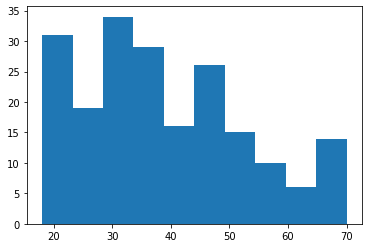

In [9]:
## Check Distribution of Age
plt.hist(df['Age'])
plt.show()
## Result: Skewed to Left

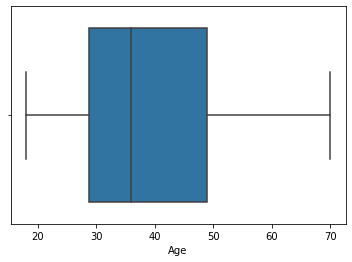

In [10]:
## Check Outliers
sns.boxplot(df['Age'])
plt.show()
## Result: No outliers

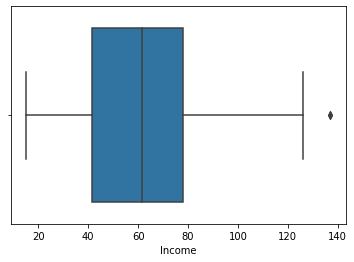

In [11]:
## Check Outliers
sns.boxplot(df['Income'])
plt.show()
## Result: Outliers detected in Income

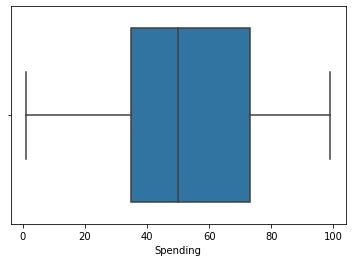

In [12]:
## Check Outliers
sns.boxplot(df['Spending'])
plt.show()
## Result: No outliers

## CLUSTERING

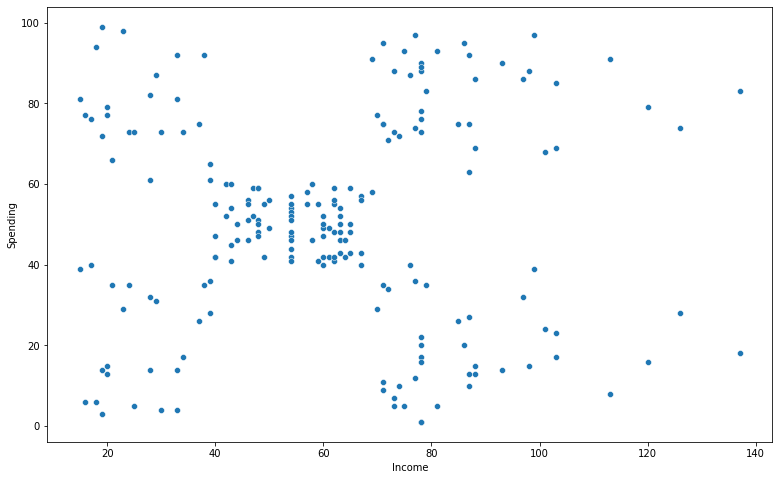

In [13]:
## Check Relationship of Income to Spending
plt.figure(figsize=(13,8))
sns.scatterplot(x='Income', y='Spending', data=df)
plt.show()
## Result: scattered, but we can see there're 5 clusters of data created

In [14]:
## Extract value from Income and Spending columns
cust = df[['Income', 'Spending']].values
cust 

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [15]:
## Define customers as x (feature)
x = cust

- Not require y (target) because this is unsupervised learning
- Did not perform data splitting because only focus on data in dataset (no simulation of new data)

In [16]:
## Import Package
from sklearn.cluster import KMeans

In [17]:
## Build Model
model_KM = KMeans(n_clusters=5, random_state=42)

In [18]:
## Fit Model
model_KM.fit(x)

KMeans(n_clusters=5, random_state=42)

In [19]:
## Predict Features
model_KM.predict(x)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [20]:
## Alternative - Fit and Predict
model_KM.fit_predict(x)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [21]:
## Add prediction as cluster
cluster = model_KM.predict(x)

In [22]:
## Add to data
df['segment'] = cluster

In [23]:
## Show Data
df.head()

,CustomerID,Gender,Age,Income,Spending,segment
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


In [24]:
## Centroid
model_KM.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [25]:
## Add centroid into variable
centroid = model_KM.cluster_centers_

In [26]:
## Annual Income
x[:, 0]

array([ 15,  15,  16,  16,  17,  17,  18,  18,  19,  19,  19,  19,  20,
        20,  20,  20,  21,  21,  23,  23,  24,  24,  25,  25,  28,  28,
        28,  28,  29,  29,  30,  30,  33,  33,  33,  33,  34,  34,  37,
        37,  38,  38,  39,  39,  39,  39,  40,  40,  40,  40,  42,  42,
        43,  43,  43,  43,  44,  44,  46,  46,  46,  46,  47,  47,  48,
        48,  48,  48,  48,  48,  49,  49,  50,  50,  54,  54,  54,  54,
        54,  54,  54,  54,  54,  54,  54,  54,  57,  57,  58,  58,  59,
        59,  60,  60,  60,  60,  60,  60,  61,  61,  62,  62,  62,  62,
        62,  62,  63,  63,  63,  63,  63,  63,  64,  64,  65,  65,  65,
        65,  67,  67,  67,  67,  69,  69,  70,  70,  71,  71,  71,  71,
        71,  71,  72,  72,  73,  73,  73,  73,  74,  74,  75,  75,  76,
        76,  77,  77,  77,  77,  78,  78,  78,  78,  78,  78,  78,  78,
        78,  78,  78,  78,  79,  79,  81,  81,  85,  85,  86,  86,  87,
        87,  87,  87,  87,  87,  88,  88,  88,  88,  93,  93,  9

In [27]:
## Spending Score
x[:, 1]

array([39, 81,  6, 77, 40, 76,  6, 94,  3, 72, 14, 99, 15, 77, 13, 79, 35,
       66, 29, 98, 35, 73,  5, 73, 14, 82, 32, 61, 31, 87,  4, 73,  4, 92,
       14, 81, 17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52,
       60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55, 52, 59, 51, 59, 50, 48,
       59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57,
       46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52, 47, 50, 42, 49, 41, 48,
       59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42, 46, 48, 50, 43, 59, 43,
       57, 56, 40, 58, 91, 29, 77, 35, 95, 11, 75,  9, 75, 34, 71,  5, 88,
        7, 73, 10, 72,  5, 93, 40, 87, 12, 97, 36, 74, 22, 90, 17, 88, 20,
       76, 16, 89,  1, 78,  1, 73, 35, 83,  5, 93, 26, 75, 20, 95, 27, 63,
       13, 75, 10, 92, 13, 86, 15, 69, 14, 90, 32, 86, 15, 88, 39, 97, 24,
       68, 17, 85, 23, 69,  8, 91, 16, 79, 28, 74, 18, 83], dtype=int64)

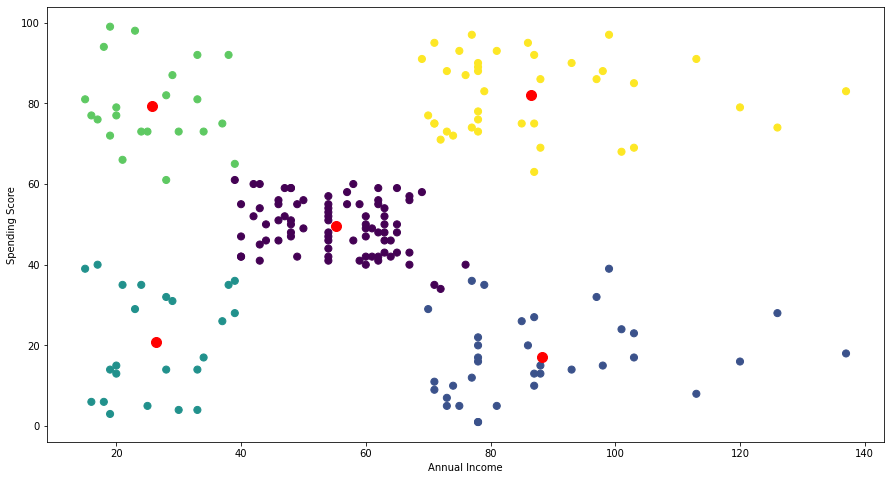

In [28]:
plt.figure(figsize=(15,8))
plt.scatter(x=x[:,0], y=x[:,1], s=50, c=cluster)
plt.scatter(x=centroid[:,0], y=centroid[:,1], s=100, c='r')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

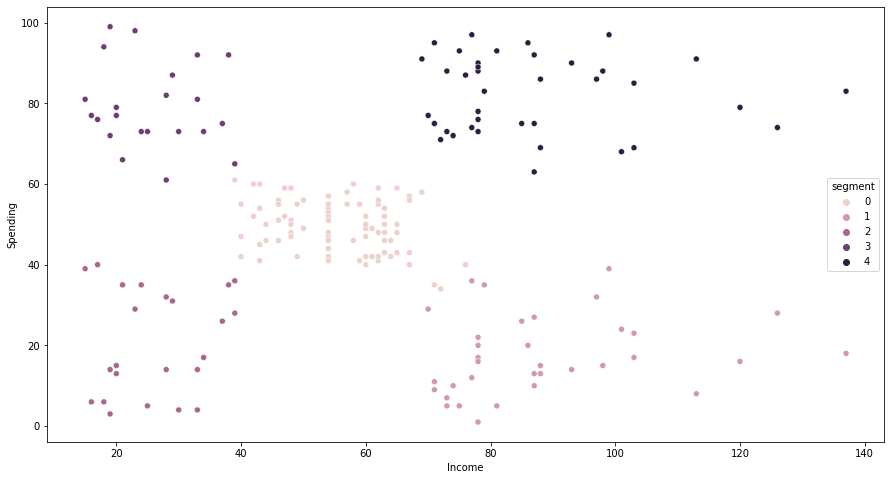

In [43]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Income', y='Spending', data=df, hue='segment')
plt.show()

### Elbow Analysis
- To find the most ideal number of clusters
- Inertia -> Number of sum of square (pangkat) of distance from data point to closest centroid
- The lower the better
- Best number of cluster (K) : K-value when decrease of inertia is insignificant

In [44]:
## Build For Loop for scoring
score=[]

for i in range(2,21):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit_predict(x)
    score.append(model.inertia_)

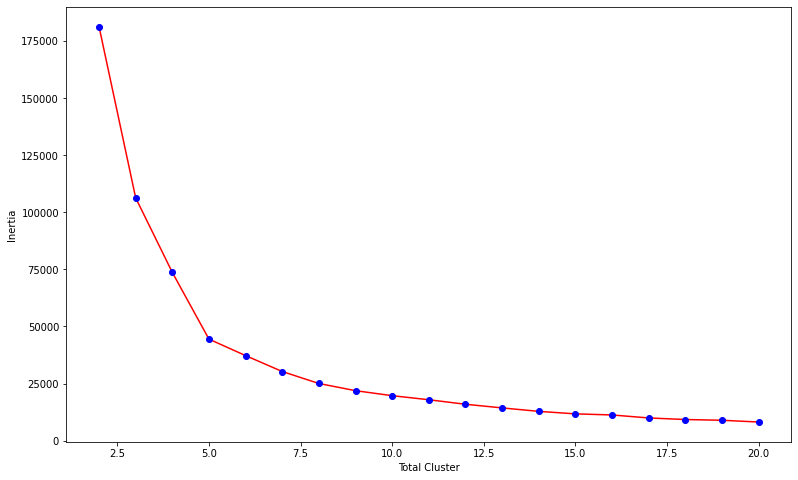

In [45]:
## Visualize
plt.figure(figsize=(13,8))
plt.plot(np.arange(2, 21), score, 'r-')
plt.plot(np.arange(2, 21), score, 'bo')
plt.xlabel('Total Cluster')
plt.ylabel('Inertia');

### Silhouette Score
- Show how close data point to centroid and how far distance between every centroids
- The higher the better
- Range 0-1

In [46]:
## Import Package
from sklearn.metrics import silhouette_score

In [47]:
## Build For Loop for scoring
score_s = []

for i in range(2, 21):
    model_K = KMeans(n_clusters=i, random_state=42)
    cluster = model_K.fit_predict(x)
    score_s.append(silhouette_score(x, cluster))

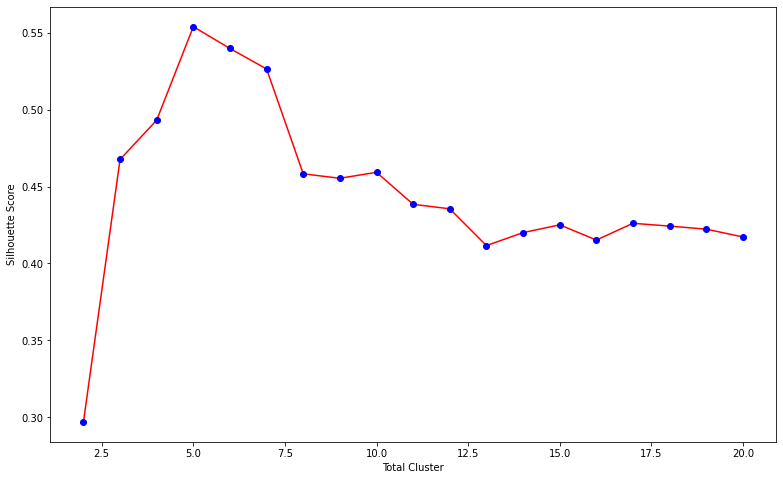

In [49]:
## Visualize
plt.figure(figsize=(13,8))
plt.plot(np.arange(2, 21), score_s, 'r-')
plt.plot(np.arange(2, 21), score_s, 'bo')
plt.xlabel('Total Cluster')
plt.ylabel('Silhouette Score');

### DBSCAN

In [59]:
## Import Package
from sklearn.cluster import DBSCAN

In [55]:
## Build, Fit and Predict withModel
dbs = DBSCAN(min_samples=4, eps=0.04)
cluster_2 = dbs.fit_predict(x)

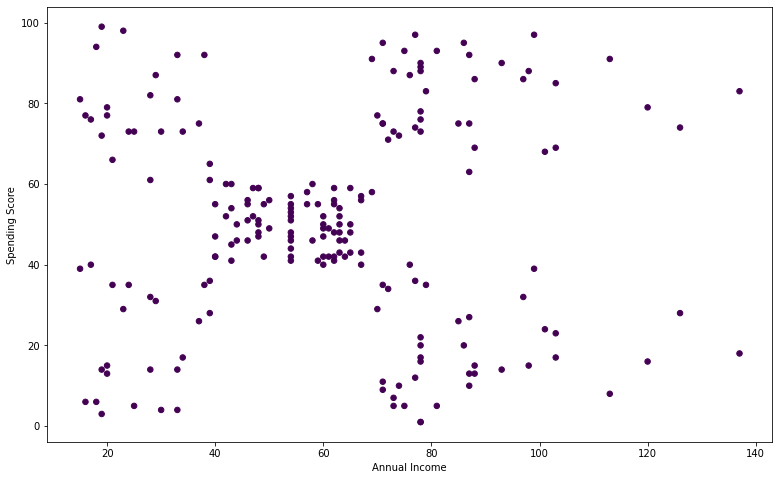

In [56]:
## Visualize
plt.figure(figsize=(13,8))
plt.scatter(x=x[:,0], y=x[:,1], s=30, c=cluster_2)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score');
## Result: DBSCAN not suitable

### Agglomerative Hierarchical Clustering

In [58]:
## Import Package
from sklearn.cluster import AgglomerativeClustering

In [63]:
## Build, Fit and Predict with Model
ahc = AgglomerativeClustering(n_clusters=5)
result = ahc.fit_predict(x)

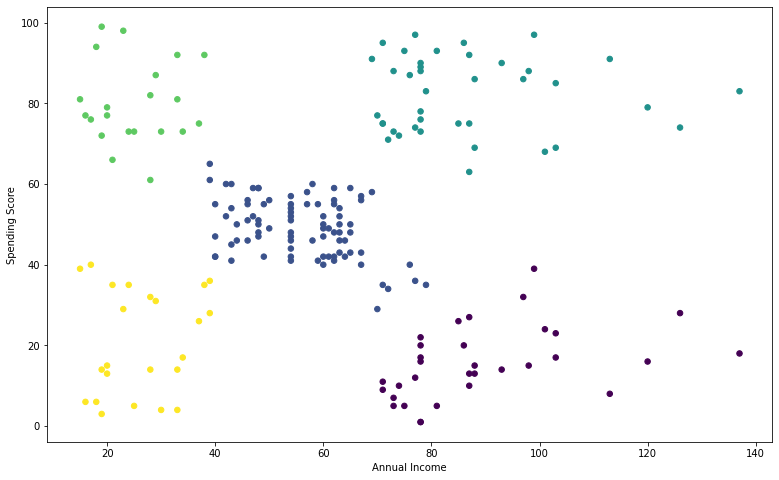

In [65]:
## Visualize
plt.figure(figsize=(13,8))
plt.scatter(x=x[:,0], y=x[:,1], s=30, c=result)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score');

In [74]:
## Import Package
from scipy.cluster.hierarchy import linkage, dendrogram

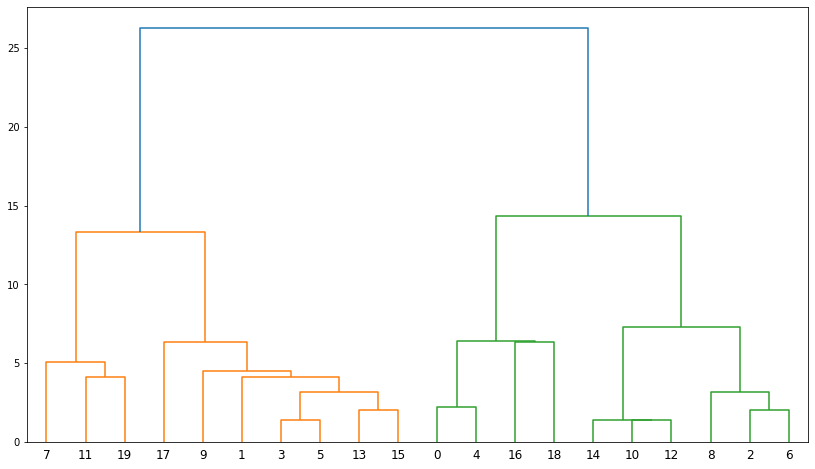

In [76]:
x_dendro = cust[:20]
z = linkage(x_dendro)
plt.figure(figsize=(14,8))
dendrogram(z);

### Gaussian Mixture

In [77]:
### Import Package
from sklearn.mixture import GaussianMixture

In [78]:
## Build, Fit and Predict with Model
gm = GaussianMixture(n_components=5)
result_3 = gm.fit_predict(x)

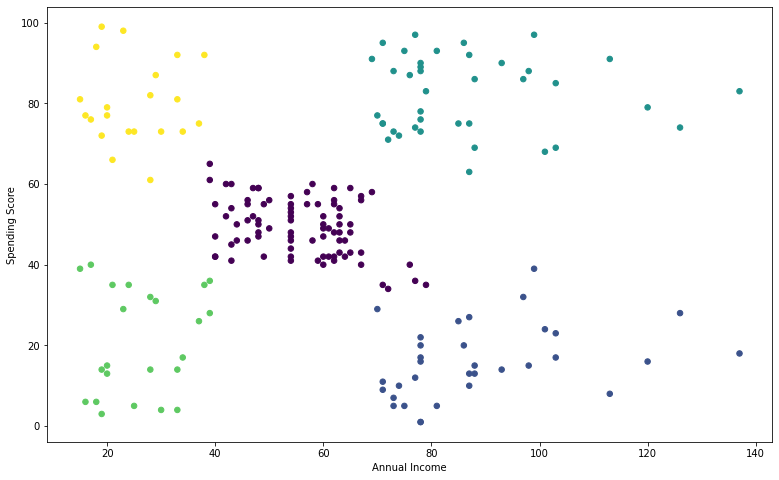

In [79]:
## Visualize
plt.figure(figsize=(13,8))
plt.scatter(x=x[:,0], y=x[:,1], s=30, c=result_3)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score');